# 1. IMPORTING ALL REQUIRED LIBRARIES

In [1]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time series & statistics
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Machine learning utilities (EDA-level)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Warnings & display
import warnings
warnings.filterwarnings("ignore")

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)


# 2. GLOBAL VISUAL SETTINGS

In [2]:
plt.style.use("seaborn-v0_8")
sns.set_context("talk")


# 3. DATA LOADING

In [4]:
df = pd.read_csv(
    "Energy_Charts_2025_to_2020.csv",
    parse_dates=["Date (GMT+1)"]
)

df.rename(columns={"Date (GMT+1)": "datetime"}, inplace=True)
df.set_index("datetime", inplace=True)


# 4. DATA UNDERSTANDING (FIRST LOOK)

In [5]:
df.head()
df.tail()


,Hydro pumped storage consumption,Cross border electricity trading,Nuclear,Hydro Run-of-River,Biomass,Fossil brown coal / lignite,Fossil hard coal,Fossil oil,Fossil coal-derived gas,Fossil gas,Geothermal,Hydro water reservoir,Hydro pumped storage,Others,Waste,Wind offshore,Wind onshore,Solar,Load,Residual load,Renewable share of load,Renewable share of generation,Day Ahead Auction (DE-LU)
datetime,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31 22:45:00+01:00,-174.4,-1803.7,8142.2,1384.4,4996.7,11151.6,4665.4,403.5,NaN,7557.0,26.8,28.8,605.7,471.1,1286.3,493.6,4931.1,0.0,46548.9,41124.2,26.8,27.0,51.86
2020-12-31 23:00:00+01:00,-577.1,-1065.5,8143.8,1382.0,4976.3,11155.7,4607.7,403.5,NaN,7522.3,26.8,15.6,486.0,471.1,1289.9,440.6,4829.9,0.0,45932.9,40662.4,26.7,26.8,52.26
2020-12-31 23:15:00+01:00,-576.9,-1032.0,8147.0,1382.8,4967.6,11132.2,4400.2,403.5,NaN,7417.2,26.9,21.4,424.8,471.1,1273.4,480.0,4629.9,0.0,45486.5,40376.6,26.6,26.8,52.26
2020-12-31 23:30:00+01:00,-192.2,-949.7,8135.0,1380.0,4951.1,11257.3,4186.5,403.5,NaN,7102.6,27.0,25.4,425.6,462.4,1298.1,430.8,4480.0,0.0,45001.3,40090.4,26.4,26.7,52.26
2020-12-31 23:45:00+01:00,-485.2,-951.2,8120.0,1378.4,4961.7,11296.9,4162.7,403.5,NaN,6959.8,27.0,22.9,197.5,461.9,1315.9,349.0,4343.3,0.0,44502.4,39810.1,26.3,26.6,52.26


In [6]:
df.shape


(210433, 23)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 210433 entries, NaT to 2020-12-31 23:45:00+01:00
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Hydro pumped storage consumption  210433 non-null  object
 1   Cross border electricity trading  210433 non-null  object
 2   Nuclear                           115293 non-null  object
 3   Hydro Run-of-River                210433 non-null  object
 4   Biomass                           210433 non-null  object
 5   Fossil brown coal / lignite       210433 non-null  object
 6   Fossil hard coal                  210433 non-null  object
 7   Fossil oil                        210433 non-null  object
 8   Fossil coal-derived gas           105217 non-null  object
 9   Fossil gas                        210433 non-null  object
 10  Geothermal                        210433 non-null  object
 11  Hydro water reservoir             210433 non-null

# 5. DATA QUALITY CHECKS

## 5.1 Missing Values


In [8]:
missing = df.isna().sum()
missing[missing > 0].sort_values(ascending=False)


Fossil coal-derived gas    105216
Nuclear                     95140
dtype: int64

## 5.2 Duplicate Rows

In [9]:
df.duplicated().sum()


np.int64(0)

 ## 5.3 Zero & Negative Values

In [11]:
(df.select_dtypes(include='number') <= 0).sum().sort_values(ascending=False)


Series([], dtype: float64)

# 6. BASIC STATISTICAL SUMMARY

In [12]:
df.describe().T


,count,unique,top,freq
Hydro pumped storage consumption,210433.0,64992.0,-1.1,205.0
Cross border electricity trading,210433.0,120904.0,-1703.0,13.0
Nuclear,115293.0,32661.0,3972.8,30.0
Hydro Run-of-River,210433.0,29569.0,2298.3,28.0
Biomass,210433.0,32724.0,4306.0,34.0
Fossil brown coal / lignite,210433.0,124069.0,13790.6,10.0
Fossil hard coal,210433.0,107771.0,1400.2,14.0
Fossil oil,210433.0,8703.0,292.6,3609.0
Fossil coal-derived gas,105217.0,9578.0,629.0,252.0
Fossil gas,210433.0,112632.0,5024.9,12.0


## Additional spread metrics:

In [15]:
df.apply(pd.to_numeric, errors="coerce").agg(["skew", "kurtosis"]).T




,skew,kurtosis
Hydro pumped storage consumption,-1.180499,0.452218
Cross border electricity trading,-0.028461,-0.668202
Nuclear,-0.281498,-1.467026
Hydro Run-of-River,0.134473,-0.818464
Biomass,-0.304721,-0.446004
Fossil brown coal / lignite,-0.186619,-1.069250
Fossil hard coal,1.052641,0.607840
Fossil oil,1.679655,8.597843
Fossil coal-derived gas,-0.426298,0.544978
Fossil gas,0.978185,0.526077


# 7. FEATURE ENGINEERING

In [21]:
df.index = pd.to_datetime(df.index, errors="coerce", utc=True)


## 7.1 Time Features

In [22]:
df["hour"] = df.index.hour
df["day"] = df.index.day
df["weekday"] = df.index.weekday
df["month"] = df.index.month


## 7.2 Renewable Aggregation

In [23]:
renewable_cols = [
    "Hydro Run-of-River",
    "Biomass",
    "Wind offshore",
    "Wind onshore",
    "Solar"
]

df["renewable_generation"] = df[renewable_cols].sum(axis=1)


# 8. UNIVARIATE EDA

# 8.1 Histograms

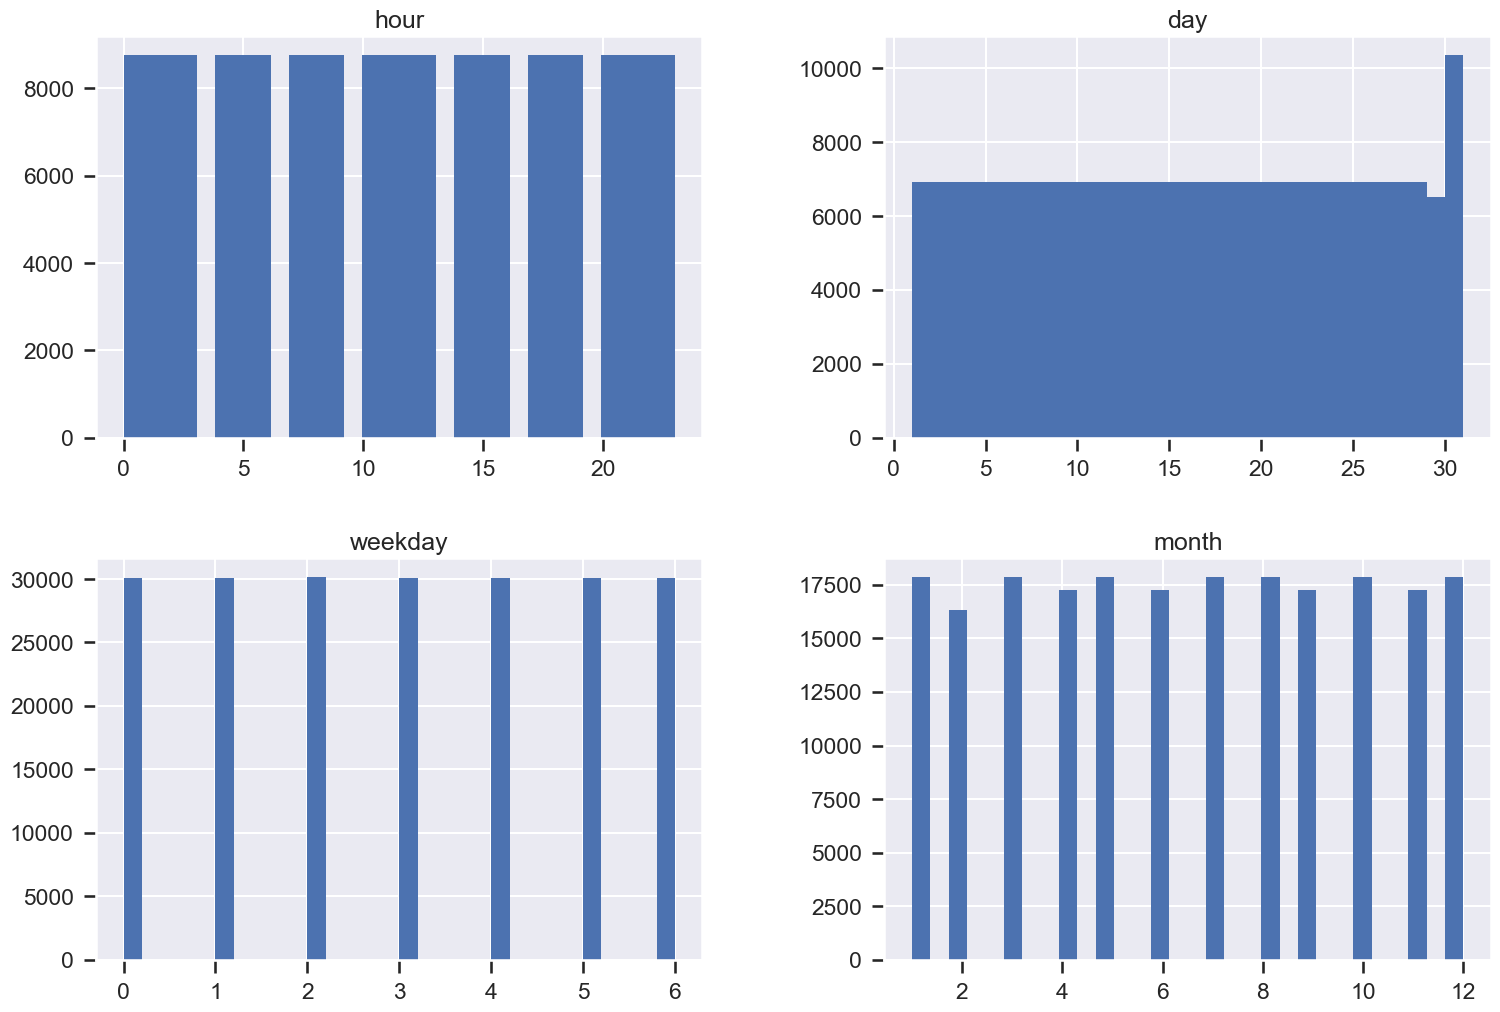

In [24]:
df.hist(bins=30, figsize=(18,12))
plt.show()


# 8.2 Boxplots (Outliers)

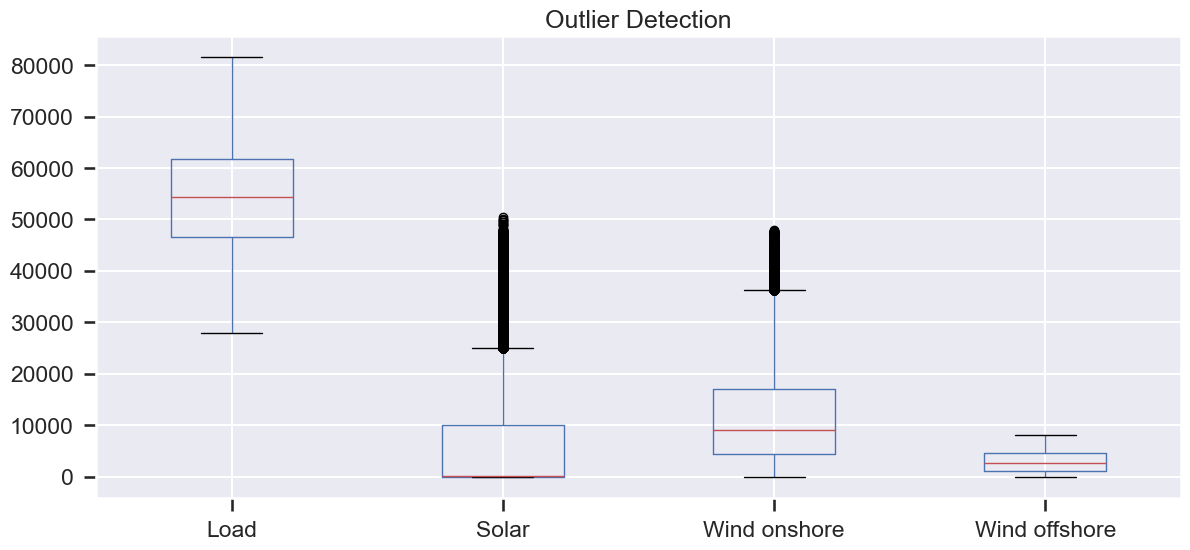

In [28]:
plt.figure(figsize=(14,6))
df[["Load", "Solar", "Wind onshore", "Wind offshore"]].boxplot()
plt.title("Outlier Detection")
plt.show()


# 9. BIVARIATE & MULTIVARIATE EDA
## 9.1 Correlation Matrix

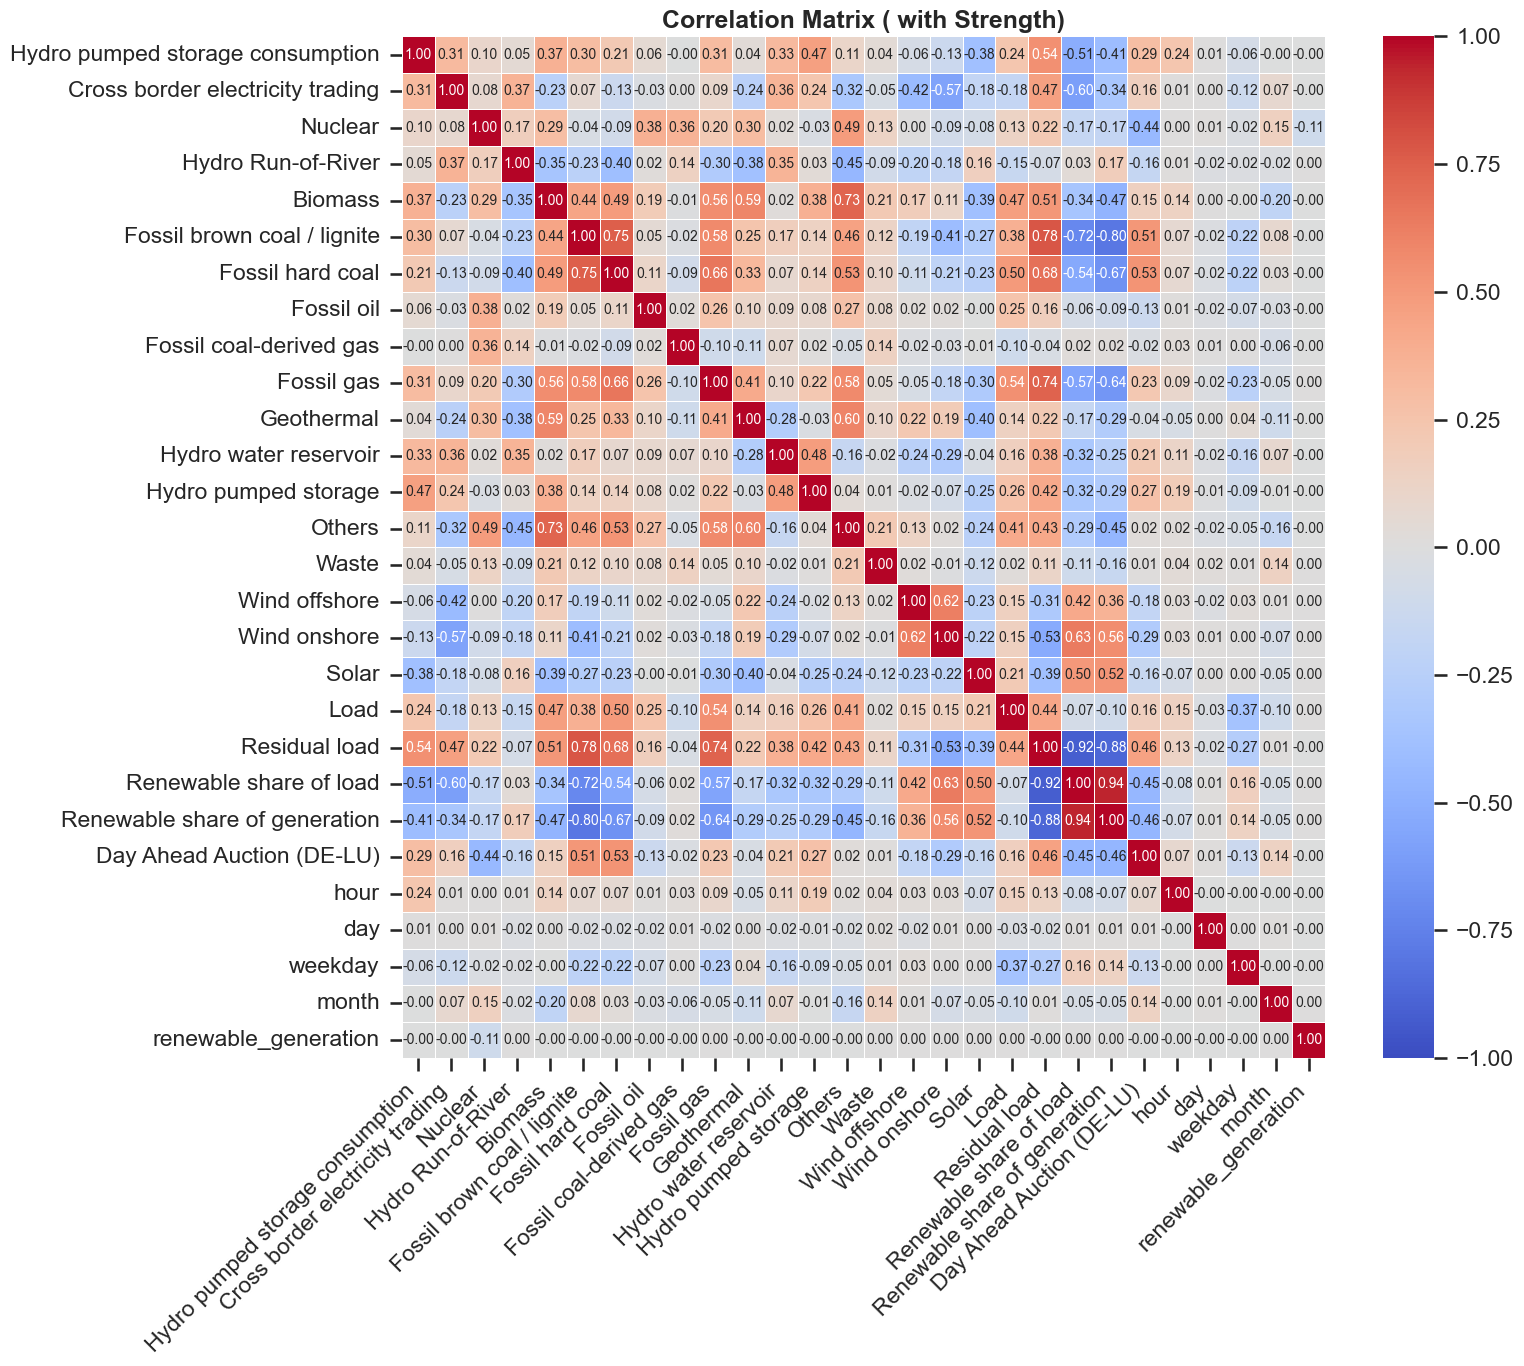

In [32]:
corr = df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    linecolor="white",
    vmin=-1,
    vmax=1,
    annot_kws={"size": 10}
)

plt.title("Correlation Matrix ( with Strength)", fontsize=18, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



## 9.2 Key Pair Relationships

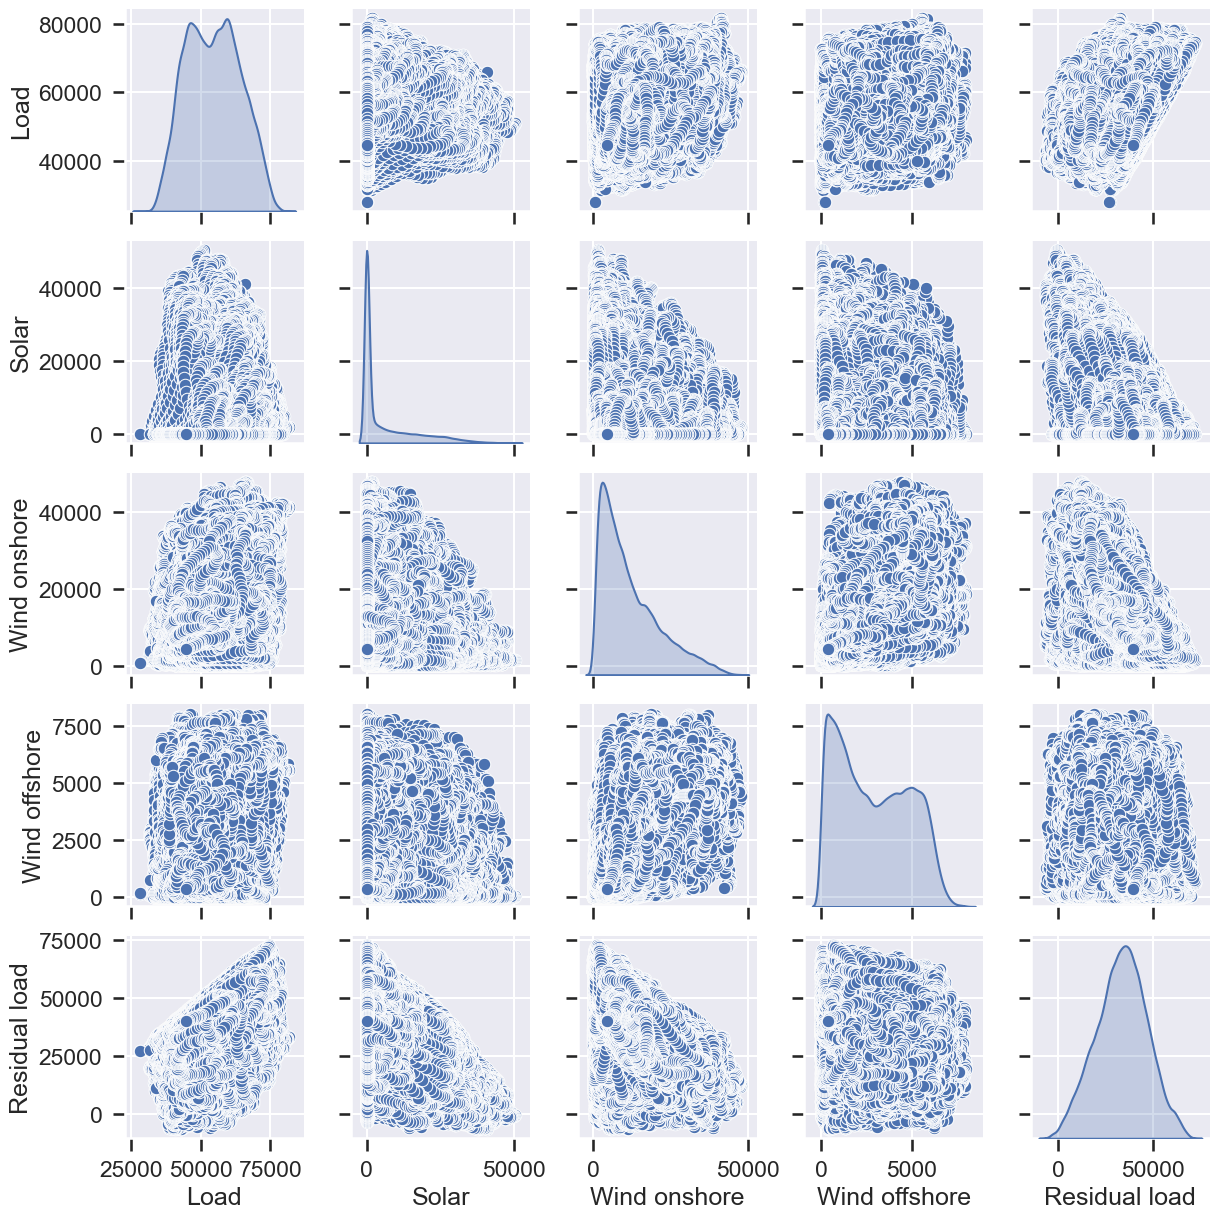

In [33]:
sns.pairplot(
    df[["Load", "Solar", "Wind onshore", "Wind offshore", "Residual load"]],
    diag_kind="kde"
)


In [34]:
#10. TIME SERIES ANALYSIS